In [ ]:
# Comprender qué contenido está disponible en diferentes países
# Identificar contenido similar haciendo coincidir características basadas en texto
# Análisis de redes de Actores / Directores y encuentre información interesante.
# ¿Netflix se ha centrado más en programas de televisión que en películas en los últimos años?

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [17]:
df = pd.read_csv('D:/Desktop/Python/Ejercicios Ciencia de datos/netflix_titles.csv')

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
df.shape

(8807, 12)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [26]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [27]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [28]:
# Llenar valores nulos en la columna "country" con un valor específico, como "Desconocido"
df['country'].fillna('Desconocido', inplace=True)

# Top 10 Países con Mayor Número de Títulos en Netflix

In [29]:
# Agrupar los datos por país y contar el número de títulos disponibles en cada país
country_counts = df['country'].value_counts()

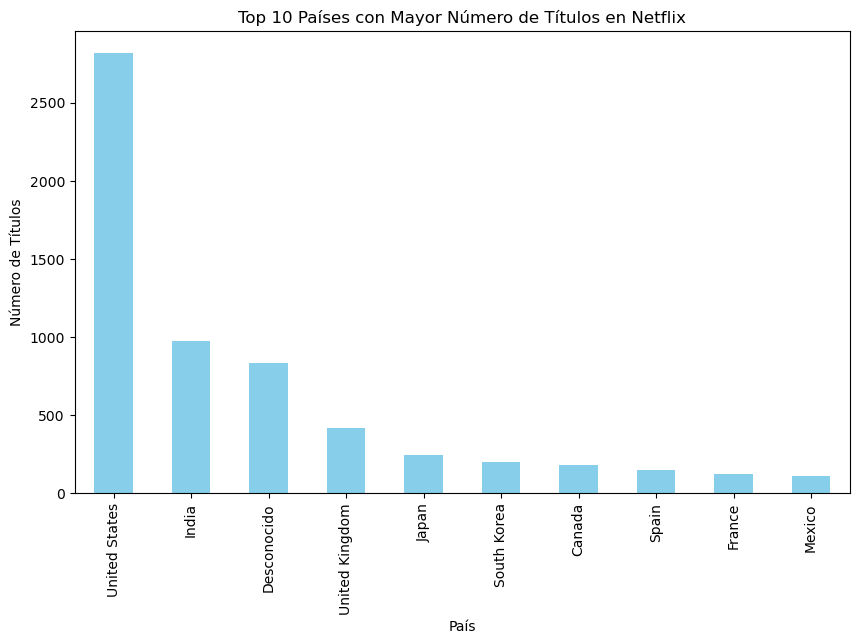

In [30]:
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
country_counts.head(10).plot(kind='bar', color='skyblue')

# Agregar etiquetas y título
plt.xlabel('País')
plt.ylabel('Número de Títulos')
plt.title('Top 10 Países con Mayor Número de Títulos en Netflix')

# Mostrar el gráfico
plt.show()


# Top 10 de distribución de géneros

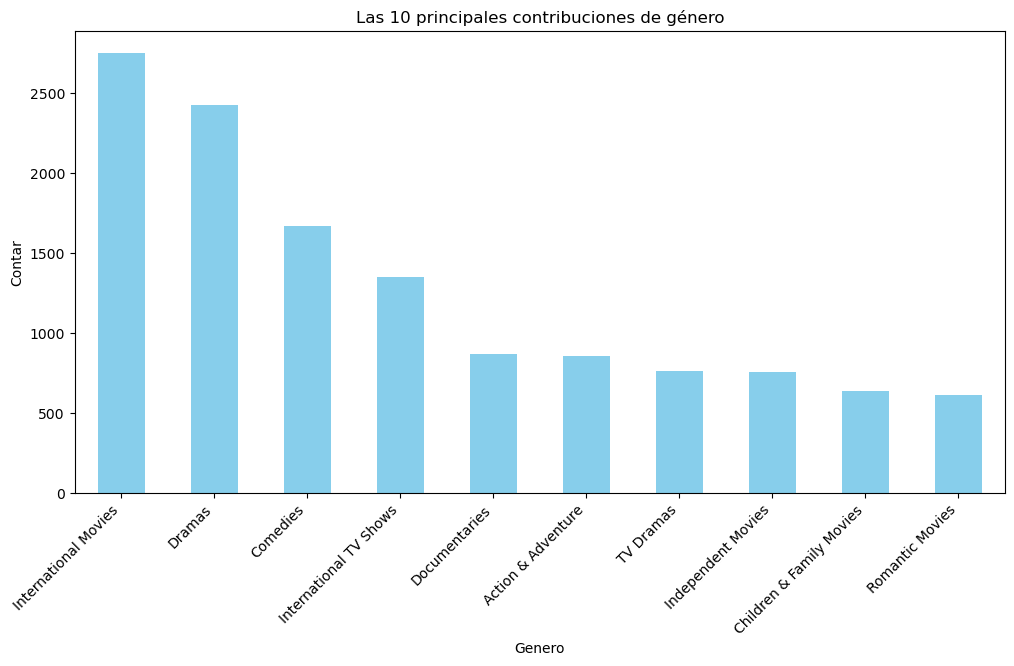

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

In [46]:
# Divida la columna 'listed_in' para extraer géneros (suponiendo que los géneros estén separados por comas)
genres = df['listed_in'].str.split(', ', expand=True).stack()

# Cuente la aparición de cada género.
genre_counts = genres.value_counts()

# Trazar la contribución del género usando un gráfico de barras (10 géneros principales)
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Las 10 principales contribuciones de género')
plt.xlabel('Genero')
plt.ylabel('Contar')
plt.xticks(rotation=45, ha='right')  # Gire las etiquetas del eje x para una mejor legibilidad
plt.show()


# Mostrar los recuentos de género (opcional)
print(genre_counts)

# Relación películas/ programa de televisión

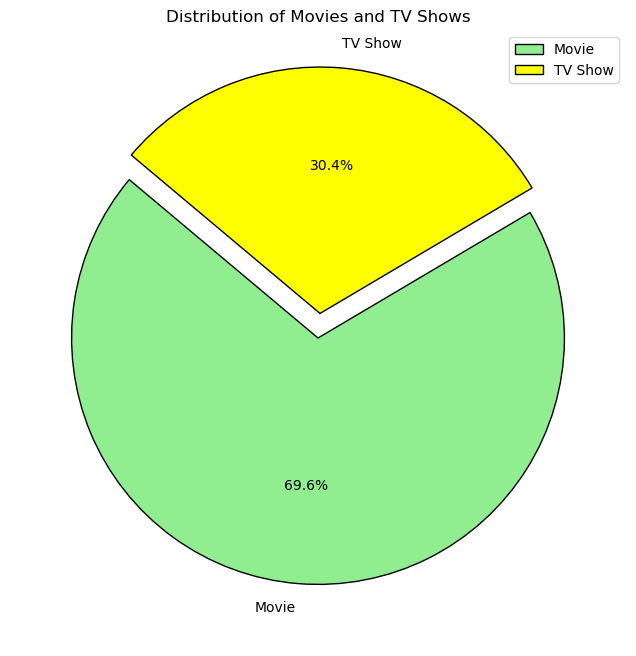

Movie      6131
TV Show    2676
Name: type, dtype: int64


In [38]:
type_counts = df['type'].value_counts()

# # Trazar la distribución usando un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140,explode = [0, 0.1], colors=['lightgreen', 'yellow'], wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Movies and TV Shows')
plt.legend()
plt.show()

# Mostrar los recuentos
print(type_counts)

# Análisis de la duración de las películas entre los años 2000 y 2020

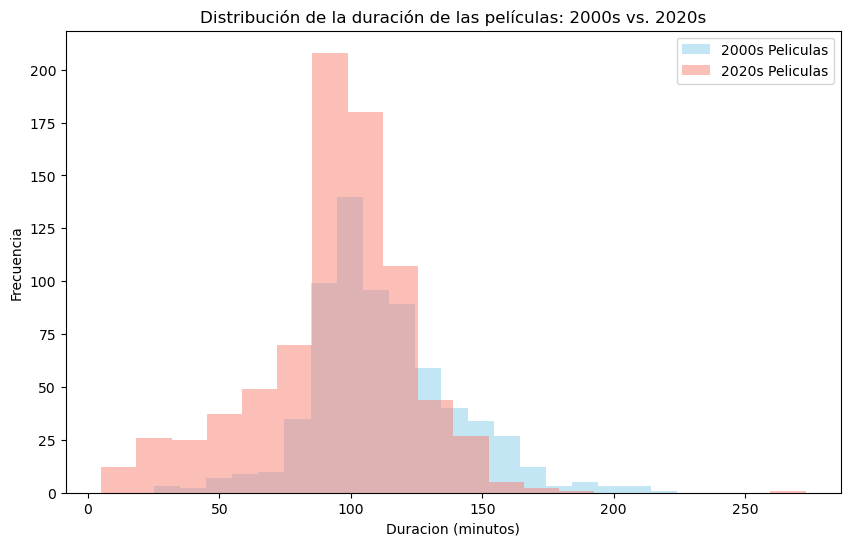

In [42]:
# Filtrado del conjunto de datos para películas estrenadas en las décadas de 2000 y 2020
movies_2000s = df[(df['type'] == 'Movie') & (df['release_year'] >= 2000) & (df['release_year'] <= 2009)]
movies_2020s = df[(df['type'] == 'Movie') & (df['release_year'] >= 2020)]

# Extraer y convertir la duración a valores numéricos (asumiendo que la 'duración' está en minutos)
movies_2000s['duration'] = pd.to_numeric(movies_2000s['duration'].str.replace(' min', ''))
movies_2020s['duration'] = pd.to_numeric(movies_2020s['duration'].str.replace(' min', ''))

# Trazar la distribución de la duración de las películas para las décadas de 2000 y 2020
plt.figure(figsize=(10, 6))
plt.hist(movies_2000s['duration'], bins=20, alpha=0.5, label='2000s Peliculas', color='skyblue')
plt.hist(movies_2020s['duration'], bins=20, alpha=0.5, label='2020s Peliculas', color='salmon')
plt.title('Distribución de la duración de las películas: 2000s vs. 2020s')
plt.xlabel('Duracion (minutos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Años con más lanzamientos

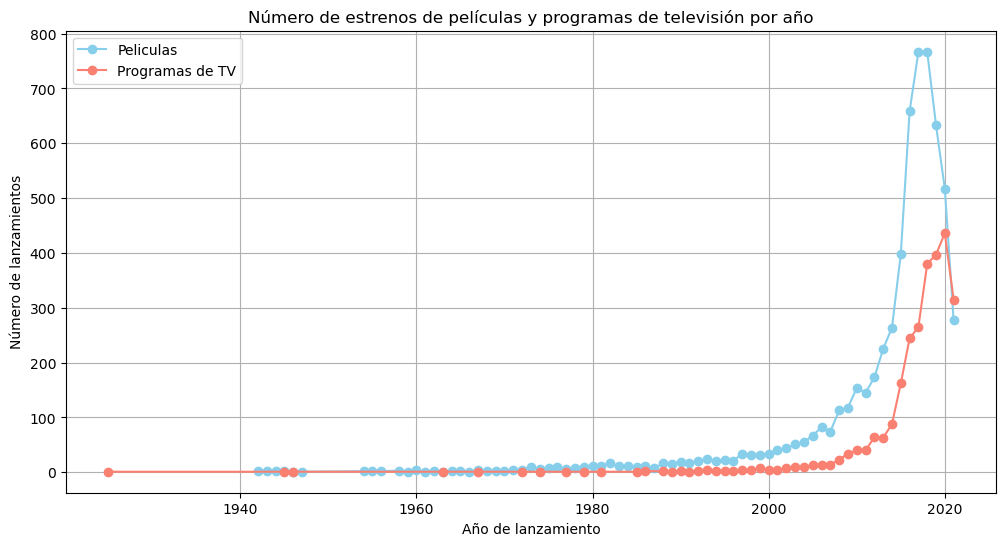

Año con más estrenos de películas: 2017 (767 lanzamientos)
Año con más lanzamientos de programas de televisión.: 2020 (436 lanzamientos)


In [45]:
# Filtrar el conjunto de datos para películas y programas de televisión por separado
movies_data = df[df['type'] == 'Movie']
tv_shows_data = df[df['type'] == 'TV Show']

# Cuente el número de estrenos por año para películas.
movies_by_year = movies_data['release_year'].value_counts().sort_index()

# Cuente el número de lanzamientos por año para programas de televisión.
tv_shows_by_year = tv_shows_data['release_year'].value_counts().sort_index()

# Trazar el número de estrenos de películas por año
plt.figure(figsize=(12, 6))
plt.plot(movies_by_year.index, movies_by_year.values, label='Peliculas', color='skyblue', marker='o')
plt.plot(tv_shows_by_year.index, tv_shows_by_year.values, label='Programas de TV', color='salmon', marker='o')
plt.title('Número de estrenos de películas y programas de televisión por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de lanzamientos')
plt.legend()
plt.grid(True)
plt.show()

# Encuentre el año con más estrenos de películas y programas de televisión
most_movie_year = movies_by_year.idxmax()
most_tv_show_year = tv_shows_by_year.idxmax()

print(f"Año con más estrenos de películas: {most_movie_year} ({movies_by_year.max()} lanzamientos)")
print(f"Año con más lanzamientos de programas de televisión.: {most_tv_show_year} ({tv_shows_by_year.max()} lanzamientos)")